<a href="https://colab.research.google.com/github/stevejj4/Customer-Reward-Analysis/blob/main/Customers_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth #Authorizing google colab
auth.authenticate_user()
import gspread #credentials for google sheet
from google.auth import default
creds,_ = default()
gc = gspread.authorize(creds) #Authorizing the connection
import pandas as pd
worksheet = gc.open('Customers').sheet1 #defining the worksheet
rows = worksheet.get_all_values() #getting all values in list of row
df = pd.DataFrame(rows)
df.columns = df.iloc[0] #creating columns name
df = df.iloc[1:]

In [ ]:
df.head()

,customer_id,became_member_on,gender,age,income
1,68be06ca386d4c31939f3a4f0e3dd783,20170212,,118,
2,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000
3,38fe809add3b4fcf9315a9694bb96ff5,20180712,,118,
4,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000
5,a03223e636434f42ac4c3df47e8bac43,20170804,,118,


In [ ]:
print("Shape of the data: ", df.shape)

Shape of the data:  (17000, 5)


In [ ]:
#Check if there are duplicates in customer_id and find there sum
df.duplicated(subset=['customer_id']).sum()



0

In [ ]:
# summary Statistics
df.describe()

,customer_id,became_member_on,gender,age,income
count,17000,17000,17000,17000,17000
unique,17000,1716,4,85,92
top,68be06ca386d4c31939f3a4f0e3dd783,20171207,M,118,
freq,1,43,8484,2175,2175


In [ ]:
#checking datatype
df.dtypes

,0
0,
customer_id,object
became_member_on,object
gender,object
age,object
income,object


In [ ]:
# Customer id is the primary key

# became_member_on shuld to date with format yy-mm-dd
# gender is categorical
# age to int
# income to float
# Convert 'became_member_on' to datetime
df['became_member_on'] = pd.to_datetime(df['became_member_on'], format='%Y%m%d') # Changed format to '%Y%m%d'

# Convert 'gender' to categorical
df['gender'] = pd.Categorical(df['gender'])

# Convert 'age' to integer
df['age'] = df['age'].astype(int)

# Convert 'income' to float, handling potential errors
df['income'] = pd.to_numeric(df['income'], errors='coerce').fillna(0).astype(float) # Changed astype(int) to astype(float) and added error handling

In [9]:
# Check the gender distribution in pie chart(comprehensive)
df.dtypes

,0
0,
customer_id,object
became_member_on,datetime64[ns]
gender,category
age,int64
income,float64


In [10]:
df.head()

,customer_id,became_member_on,gender,age,income
1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,,118,0.0
2,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0
3,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,,118,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0
5,a03223e636434f42ac4c3df47e8bac43,2017-08-04,,118,0.0


In [11]:
# Gender distribution
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
M    8484
F    6129
     2175
O     212
Name: count, dtype: int64


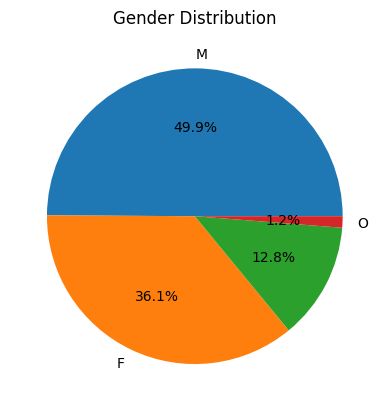

In [13]:
# Gender represented in pie chart
# include the legend
import matplotlib.pyplot as plt
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


In [15]:
# Age statistics the min, max, median, mode, mean
age_stats = df['age'].describe()
print(age_stats)

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64


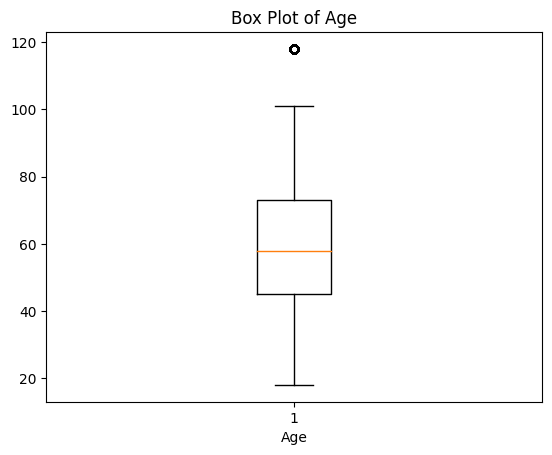

In [16]:
# Box plot to see outliers and treat them
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

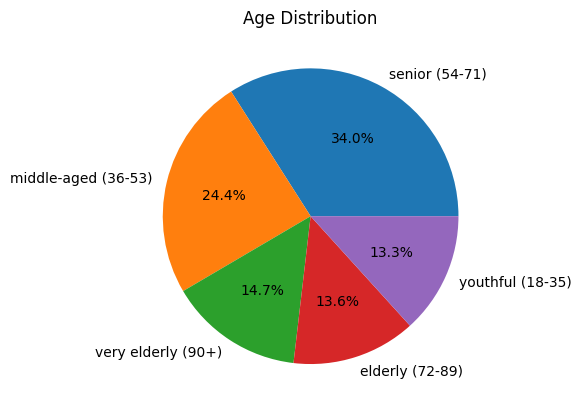

In [18]:
# Define age groups
age_bins = [18, 35, 53, 71, 89, float('inf')]
age_labels = ['Youthful (18-35)', 'Middle-aged (36-53)', 'Senior (54-71)', 'Elderly (72-89)', 'Very elderly (90+)']

# Categorize ages
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate distribution
age_distribution = df['age_group'].value_counts()

# Pie chart
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

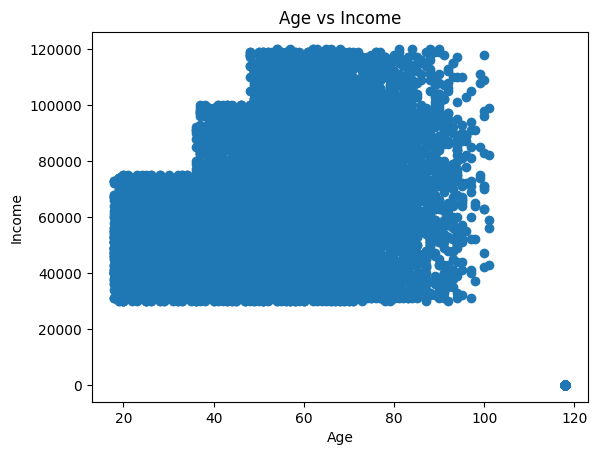

In [14]:
# Scatter plot to see age
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()